In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import pandas as pd 

In [90]:
train_df = pd.read_csv('~/documents/datasets/titanic/train.csv')

In [5]:
train_df.head() #peak into the dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()   #see count and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_df["Sex"].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_df["SibSp"].value_counts() 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
train_df["Parch"].value_counts() 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [17]:
train_df["Embarked"].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
train_df["Ticket"].value_counts() 

CA. 2343      7
1601          7
347082        7
3101295       6
347088        6
             ..
19972         1
2664          1
A/5. 10482    1
330931        1
315098        1
Name: Ticket, Length: 681, dtype: int64

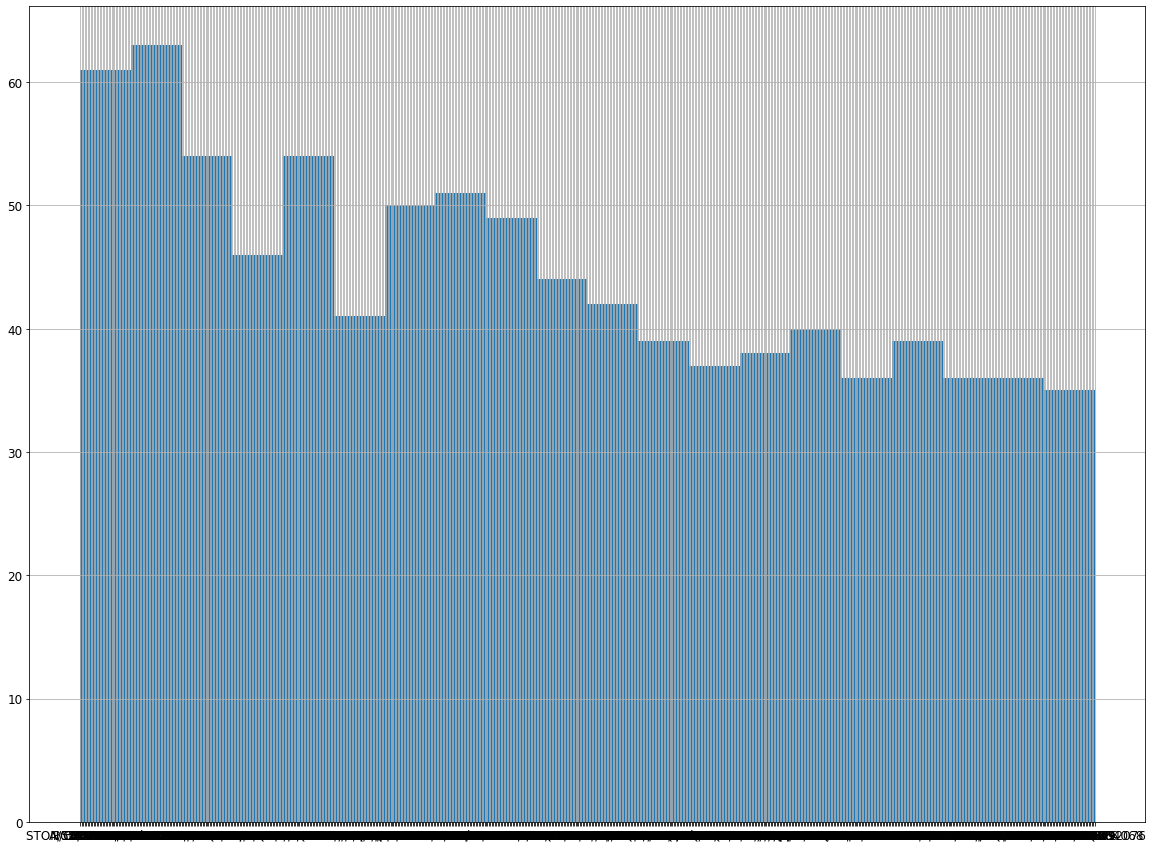

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df["Ticket"].hist(bins=20, figsize=(20,15))
plt.show()

In [9]:
train_df.describe() #SEE DISTRIBUTION

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fortune, Miss. Mabel Helen",male,CA. 2343,G6,S
freq,1,577,7,4,644


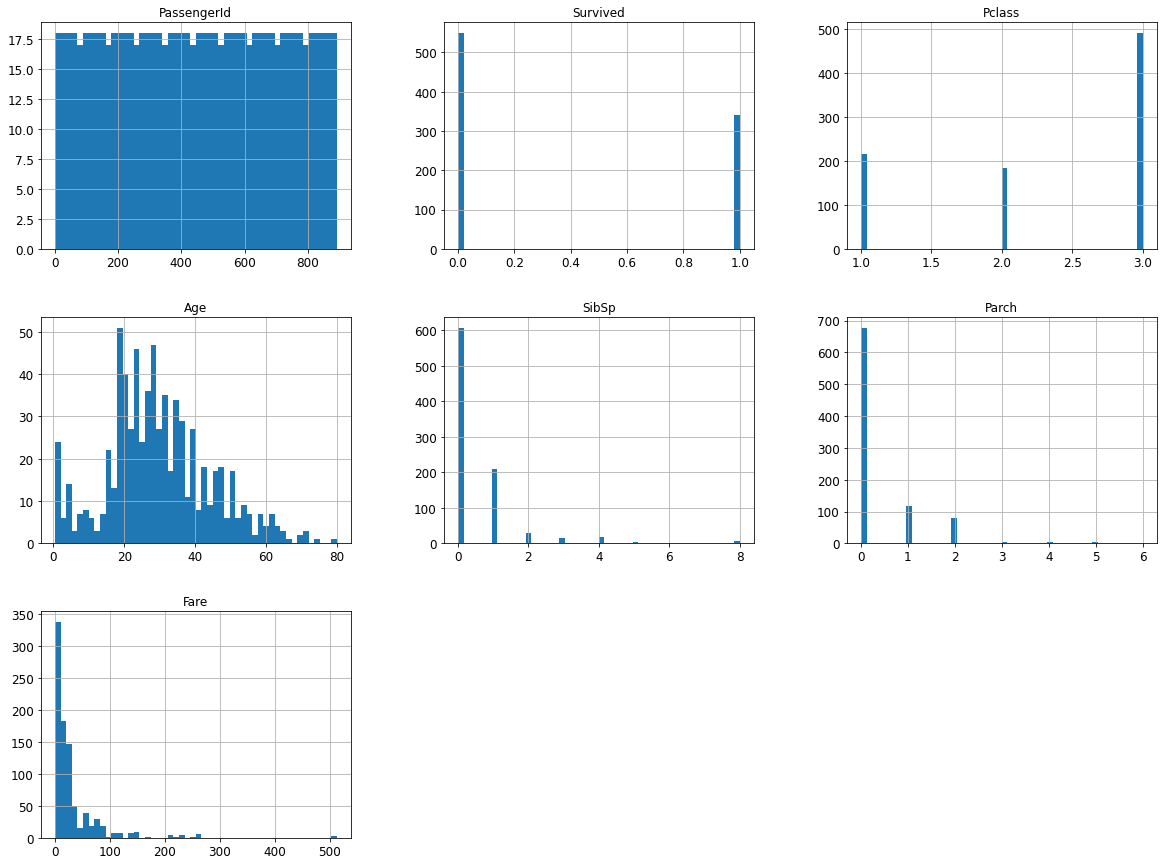

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
corr_matrix = train_df.corr()

In [20]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

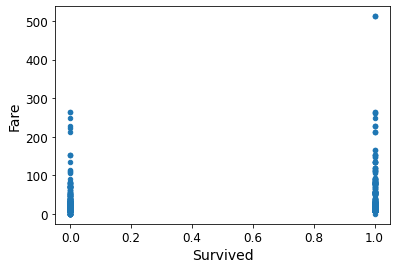

In [22]:
train_df.plot(kind="scatter", x="Survived", y="Fare")


In [29]:
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Prep

In [91]:
train_df_labels = train_df["Survived"].copy()
train_df = train_df.drop("Survived", axis=1) # drop labels for training set

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Handle Missing values 

In [92]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [93]:
#housing_num = train_df[["Age"]].copy()
train_df_num = train_df.select_dtypes(include=[np.number])

In [94]:
imputer.fit(train_df_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [95]:
X = imputer.transform(train_df_num)

In [96]:
train_df_tr = pd.DataFrame(X, columns=train_df_num.columns,
                          index=train_df.index)

In [101]:
train_df_tr.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,35.0,0.0,0.0,8.0500


## Next handle categorial values

In [110]:
train_df_cat = train_df[["Embarked","Sex"]]
train_df_cat.tail()

,Embarked,Sex
886,S,male
887,S,female
888,S,female
889,C,male
890,Q,male


In [111]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(train_df_cat)
X = imputer.transform(train_df_cat)

In [112]:
train_df_cat = pd.DataFrame(X, columns=train_df_cat.columns,
                          index=train_df.index)

In [113]:
train_df_cat.tail()

,Embarked,Sex
886,S,male
887,S,female
888,S,female
889,C,male
890,Q,male


In [114]:
train_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  891 non-null    object
 1   Sex       891 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [115]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
_1hot_df_cat_embarked = cat_encoder.fit_transform(train_df_cat[["Embarked"]])
housing_cat_1hot

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [ ]:
train_df_cat_embarked = pd.DataFrame(_1hot_df_cat_embarked, columns=['Embarked'],
                          index=train_df.index)

In [82]:
train_df_cat.head()

,Embarked,Sex
0,S,male
1,C,female
2,S,female
3,S,female
4,S,male


In [85]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
_1hot_df_cat_sex = cat_encoder.fit_transform(train_df_cat[["Sex"]])
housing_cat_1hot

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [65]:
cat_encoder.categories_


[array(['C', 'Q', 'S'], dtype=object), array(['female', 'male'], dtype=object)]

In [69]:
columns=train_df_cat.columns
columns

Index(['Embarked', 'Sex'], dtype='object')

In [86]:

train_df_cat_sex = pd.DataFrame(_1hot_df_cat_sex, columns=['Sex'],
                          index=train_df.index)

## MERGE DATA

In [102]:
train_set_ready = pd.concat([train_df_tr,train_df_cat_embarked,train_df_cat_sex])


In [108]:
train_df_cat_sex.head()

,Sex
0,"(0, 1)\t1.0"
1,"(0, 0)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 1)\t1.0"


In [104]:
train_df_tr.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
886,887.0,2.0,27.0,0.0,0.0,13.00
887,888.0,1.0,19.0,0.0,0.0,30.00
888,889.0,3.0,28.0,1.0,2.0,23.45
889,890.0,1.0,26.0,0.0,0.0,30.00
890,891.0,3.0,32.0,0.0,0.0,7.75


In [103]:
train_set_ready

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1.0,3.0,22.0,1.0,0.0,7.2500,NaN,NaN
1,2.0,1.0,38.0,1.0,0.0,71.2833,NaN,NaN
2,3.0,3.0,26.0,0.0,0.0,7.9250,NaN,NaN
3,4.0,1.0,35.0,1.0,0.0,53.1000,NaN,NaN
4,5.0,3.0,35.0,0.0,0.0,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 1)\t1.0"
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0)\t1.0"
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0)\t1.0"
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 1)\t1.0"


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
#sgd_clf.fit(X_train, y_train_5)
#sgd_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
cm = confusion_matrix(y_train_5, y_train_pred)


In [ ]:
recall_score(y_train_5, y_train_pred)


In [ ]:
f1_score(y_train_5, y_train_pred)
